In [11]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline
from collections import OrderedDict
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import KFold

<h1>Question 1

# Regularization in Linear Regression

## Introduction 
Linear regression is very popular statistical model that is used to represent the relationship between some outcome variable $y_i$ and covariates (also known as features, explanatory variables, and independent variables) $x = (x_{1i}, x_{2i}, \ldots, x_{ki})$ using linear weights $\hat{\beta} = (\hat{\beta_{0}}, \hat{\beta_{1}}, \ldots, \hat{\beta_{k}}).$ The weights are choosen in a way such that the function $$f(x_{i};\hat{\beta}) = \hat{\beta_{0}} + \hat{\beta_{1}}x_{1i} + \ldots + \hat{\beta_{k}}x_{ki},$$ for $i = 1, \ldots, n$ best fits the data. Note that $\beta$ is a unknown regression parameter, and $\hat{\beta}$ is its estimate from a learning algorithm. That is the model $f(x_{i};\hat{\beta})$ is estimating the following assumed true linear relationsthip between $y_{i}$ and $x_{i},$
$$y_{i} = \beta_{0} + \beta_{1}x_{1i} + \ldots + \beta_{k}x_{ki} + \epsilon_{i},$$ where $\epsilon_{i}$ is a mean zero stochastic error term. The "linear" in linear regression means that the model is linear in the parameters, so $y_{i} = \beta_{0} + \beta_{1}x_{i}^2$ is a linear model, but $y_{i} = \beta_{0}x_{i}^{\beta_{1}}$ is nonlinear in parameters. 


This function can be used to predict outcome $y_{i}$ given any covariates $x_{1i}, \ldots, x_{ki}.$ However a caveat for using linear regression with many covariates for prediction is that the model may "overfit" the data and may not be generalizable. Overfitting occurs when the model captures too much of the noise in the data which cannot generalize outside of sample. We will discuss a popular remedy to the overfitting problem, regularization. Intuitively speaking, regularlization is a method of changing the standard definition of a model "best fitting" the data in a way that its predictions are more generalizable to new data sets. 

## Overfitting in linear regression

Overfitting is often a result of the model having too many parameters relative to the training data. 

## L1 and L2 Regularization methods

Suppose we are trying to model the relationship between $y_{i}$ and $x_{i}$ using a high degree polynomial (10 degrees for example). If we minimize $Error(\beta)$ above (square loss) to estimate our model, then this model is prone to overfitting if the higher order terms are assigned large weights to caputure noise in the data. The simple idea behind regularization is that we add a penalty function to the standard square loss function so that learning algorithm doesn't easily assign large weights to the higher order covariates. The $L1$ regularized error function is $$Error_{L1}(\beta) = \frac{1}{2}\sum_{i=1}^{n}(f(x_{i};\beta)-y_{i})^2 + \frac{\lambda}{2} \sum_{i=1}^{k}|\beta_{i}|,$$ and the $L2$ regualirized error function is $$Error_{L2}(\beta) = \frac{1}{2}\sum_{i=1}^{n}(f(x_{i};\beta)-y_{i})^2 + \frac{\lambda}{2} \sum_{i=1}^{k}\beta_{i}^{2},$$ where $\lambda$ is the regularization parameter. Note that using the $L1$ loss function is known as lasso regression, and using the $L2$ loss function is known as ridge regression. The regularized terms $\frac{\lambda}{2} \sum_{i=1}^{k}|\beta_{i}|,\frac{\lambda}{2} \sum_{i=1}^{k}\beta_{i}^{2}$ in the $L1$ and $L2$ loss functions respectively shrink the parameters $(\beta_{1}, \ldots, \beta_{k})$ towards 0 (notice the intercept $\beta_{0}$ is excluded from the regularized term). Suppose the true relationship between $y_{i}$ and $x_{i}$ is quadratic, then regularization should prevent our 10 degree polynomial from overfitting as now the higher degree terms will likely be assigned lower weight than if we had used the standard sqaure loss $Error(\beta).$ The tuning parameter $\lambda$ is usually determined by using a methadology known as cross validation. We will cover cross validation for a later part of the notebook, for now we will just set $\lambda = (1,15) .$ in both cases to plot the relation between MSE and  $\lambda 

## Estimating linear model parameters

Optimization algorithms such as Gradient Descent can be used to minimize a given loss function and estimate the parameters in our linear model. However since the main purpose is to illustrate regularization methods, for code simplicity we will use well known closed form solutions to implement standard linear regression and $L2$ regularization. Using matrices, we can re-write the assumed true linear relationship between $y_{i}$ and $x_{i}$ as

$$\begin{bmatrix}
    y_{1} \\
    y_{2} \\
    \vdots \\
    y_{n}
\end{bmatrix} 
=
\begin{bmatrix}
    1 & x_{11} & \ldots & x_{k1}\\
    \vdots & \vdots & \ldots & \vdots \\
    1 & x_{12} & \ldots & x_{k2}\\
    1 & x_{1n} & \ldots & x_{kn}
\end{bmatrix} 
\begin{bmatrix}
    \beta_{0} \\
    \beta_{1} \\
    \vdots \\
    \beta_{k}
\end{bmatrix} 
+
\begin{bmatrix}
    \epsilon_{1} \\
    \epsilon_{2} \\
    \vdots \\
    \epsilon_{n}
\end{bmatrix}.
$$
Using outcome vector $y$, coeffecient vector $\beta$, error vector $\epsilon$, and covariate matrix $X$ (also known as design matrix), we can re-write the above equation as $y = X\beta + \epsilon.$ For the standard square loss function, the closed form solution for the parameters is $\hat{\beta} = (X'X)^{-1}X'y,$ and for the $L2$ regularized loss function the closed form solution is $\hat{\beta} = (X'X + \lambda I)^{-1}X'y,$ where I = 
$
\begin{bmatrix}
    0 & 0 & \ldots & 0\\
    0 & 1 & \ldots & 0\\
    0 & 0 & 1 & 0 \\
    \vdots & \vdots & \ldots & \vdots \\
    0 & 0 & \ldots & 1
\end{bmatrix}. 
$
Note that the $L1$ regularized loss function doesn't have a closed form solution for the parameters so we have to use Gradient Descent to implement it. 

## Deriving the closed form solutions
For ridge regression, the matrix representation of the $L2$ loss function is $$Error_{L2}(\beta) = \frac{1}{2}(f(x;\beta) - y)'(f(x;\beta) - y)+\frac{\lambda}{2}\beta'\beta,$$ where $y$ is outcome vector, $f(x,\beta) = X\beta$ is vector of linear model predictions, and $\beta$ is parameter vector. To estimate $\beta$, we minimize $Error_{L2}(\beta)$ and hence compute $\frac{d Error_{L2}(\beta)}{d\beta} = 0.$ After differentiation $Error_{L2}(\beta)$ with respect to $\beta$ we can obtain $$X'X\beta-X'y+\lambda I\beta = 0,$$ and rearranging the above equation results in $\hat{\beta} = (X'X + \lambda I)^{-1}X'y$, the closed form solution for ridge regression. 

<h2>Q_1_1 : Lasso Regression using GD

Text(0.5, 1.0, 'Lambda vs Error Values')

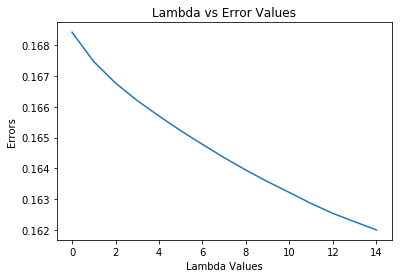

In [33]:
def ols(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

def gradientDescent(X,L1):
    X = np.insert(X,0,1,axis=1)
    Y = np.array(train['Chance of Admit '].values)
    Y = np.asmatrix(Y).T
    r,c = X.shape
    theta = [0 for i in range(c)]
    dtheta = np.array(theta).reshape(len(theta),1)
    alpha = 0.01
    iteration = 1000
    for i in range(iteration):
        t = np.matmul(X,dtheta)
        value = np.subtract(t,Y)
        value = np.matmul(X.T,value)
        value = (alpha/r)*(value+L1*np.sign(dtheta))
        dtheta = np.subtract(dtheta,value)
    return dtheta

Lamda = []
mse = []

data = pd.read_csv('Datasets/data.csv')
data = data.drop('Serial No.',axis=1)
data=(data-data.mean())/data.std()
train = data.sample(frac=0.8, random_state=200) 
validation = data.drop(train.index)
train_X = train.drop('Chance of Admit ',axis=1)
train_X = train_X.values

for i in range(0,15):
        Lamda.append(i)
        B = gradientDescent(train_X,i)
        val = validation.drop('Chance of Admit ',axis=1)
        val = val.values
        val = np.insert(val,0,1,axis=1)
        prediction = np.dot(val,B)
        n = (np.array(prediction)).flatten()
        actual = validation['Chance of Admit '].tolist()
        e = 0
        for i in range(len(n)):
            e += pow(actual[i]-n[i],2)
        e = e/len(n)
        mse.append(e)
        
# print(Lamda)
plt.plot(Lamda,mse)
plt.xlabel('Lambda Values')
plt.ylabel('Errors')
plt.title("Lambda vs Error Values")

<h2>Q_1_2 : Ridge Regression using Closed Form

Text(0.5, 1.0, 'Lambda vs Error Values')

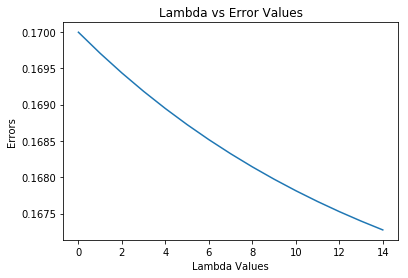

In [45]:
def Q2(L2):
    fname = 'Datasets/data.csv'
    df = pd.read_csv(fname)
    df = df.drop('Serial No.',axis=1)
    df = (df - df.mean())/df.std()
    train = df.sample(frac=0.8,random_state=200)
    validate = df.drop(train.index)

    # print(df)

    y = train['Chance of Admit ']
    train = train.drop('Chance of Admit ',axis=1)

    actual = validate['Chance of Admit ']
    validate = validate.drop('Chance of Admit ',axis=1)


    # adding 1's
    one = []
    for i in range(len(train.index)) :
        one.append(1)
    train.insert(0, 'ones', one, allow_duplicates = False)
    # Dataframe to Matrix

    # Validation data handling
    one_validate = []
    for i in range(len(validate.index)) :
        one_validate.append(1)
    validate.insert(0, 'ones', one_validate, allow_duplicates = False)

    X = train.values
    Y = y.values

    Xt = X.transpose()
    XXt = np.matmul(Xt,X)
    X_inv = np.linalg.inv(XXt+ L2*np.identity(8,dtype=float))


    B = np.matmul((np.matmul(X_inv,Xt)),Y)

    X_validate = validate.values
#     print(X_validate.shape)
    prediction = np.matmul(X_validate,B)
    prediction = prediction.tolist()



    actual = actual.tolist()

    error_count = 0

    for i in range(len(actual)) :
        error_count = error_count + (pow((actual[i] - prediction[i]),2))
    error_count = error_count/len(actual)
#     print("MSE :: ",error_count)
    return error_count
L = []
mse = []
for i in range(15):
    mse.append(Q2(i))
    L.append(i)
plt.plot(L,mse)
plt.xlabel('Lambda Values')
plt.ylabel('Errors')
plt.title("Lambda vs Error Values")


<h2> Q_1_3 : Hyperparameter $\lambda $ </h2>
    
The hyperparameter $\lambda $ controls this tradeoff by adjusting the weight of the penalty term. If $\lambda $ is increased, model complexity will have a greater contribution to the cost. As per our hypothesis we can say that higher $\lambda $ will bias the selection toward models with lower complexity.

<h2> Q_1_4 : Lasso vs Ridge Regression

Ridge regression can't zero out coefficients; thus, you either end up including all the coefficients in the model, or none of them. In contrast, the LASSO does both parameter shrinkage and variable selection automatically.
Another popular model is Elastic Net, which is often used to squeeze the best out of both the techniques.

More detailed theory on both is explained in Introductory part and for further mathematical derivation I have provided a reference link below.

Reference : https://www.datasciencecentral.com/profiles/blogs/intuition-behind-bias-variance-trade-off-lasso-and-ridge

---------------------------------------------------------------------------------------
<h1> Question 1_5 : K-fold and LOOCV (implemented for Ridge Regression)

Text(0.5, 1.0, 'K vs Error Values')

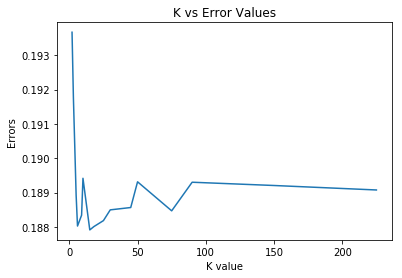

In [65]:
def Q2(train_a,validation,L2):
    train = np.delete(train_a,7,1)
    train = np.insert(train,0,1,axis=1)
    train_Y = np.asmatrix(np.array(train_a[:,[7]]))
    train_X_bar = train.transpose()
    matrix_mul = np.dot(train_X_bar,train)
    X_inverse = np.linalg.inv(matrix_mul + L2*np.identity(8,dtype=float))
    inter_matrix = np.dot(X_inverse,train_X_bar)  
    beta = np.dot(inter_matrix,train_Y)
    validation_Y = np.delete(validation,7,1)
    validation_Y = np.insert(validation_Y,0,1,axis=1)
    actual = np.array(validation[:,[7]])
    predicted_Y_bar = np.dot(validation_Y,beta)
    mse = 0
    for i in range(len(predicted_Y_bar)):
        mse = mse + pow(actual[i] - predicted_Y_bar[i],2)
    mse = mse/len(actual)
    return mse
    
fname = 'Datasets/data.csv'
df = pd.read_csv(fname)
df = df.drop('Serial No.',axis=1)
# print(df)
df = (df - df.mean())/df.std()
df = df.values
split_points = []
N = (len(df))
for i in range(2,N):
    if N % i == 0:
        split_points.append(i);

test_error = []

for i in range(len(split_points)):
    kf = KFold(n_splits=split_points[i])
    per_loop_error = []
    for train_index, test_index in kf.split(df):
        X_train, X_test = df[train_index], df[test_index]
        #Y_train, Y_test = data[train_index], data[test_index]
        E = Q2(X_train,X_test,1)
        per_loop_error.append(E)
    test_error.append(np.mean(per_loop_error))

# print(split_points)
plt.plot(split_points,test_error)
plt.xlabel('K value')
plt.ylabel('Errors')
plt.title("K vs Error Values")